# In class exercises for 11.02.2020 (Filtering)

## First import data from eeg_data00.npz

In [3]:
# first import the modules that you'll need: numpy, matplotlib.pyplot, my_brick_filt 
import numpy as np
import matplotlib.pyplot as plt
import my_brick_filt as mf 

## Just like in the first FFT tutorial load eeg_data00.npz so that we have an EEG data set to play with
* you should find that it has three arrays: data, tx, and sr (with 'data' a #trials x # timepoints array containing the EEG data, the time of each data acquisition in tx, and the sample rate stored as sr).  

In [5]:
# load the data...
eeg = np.load('eeg_data00.npz')

# get the different arrays like this...kind of like a structure in matlab. 
eeg['data']
eeg['sr']
eeg['tx']

# and can query the attributes of the data like this...which will tell us that there 960 trials and 876 timepoints per trial sampled
# at 250Hz
print('Shape of the big eeg data set: ', eeg['data'].shape)
print('Sample rate: ', eeg['sr'])

# and if you want to save some typing, especially because we only have a few variables, you reassign the different arrays like this
data = eeg['data']
sr = eeg['sr']
tx = eeg['tx']
# now you can just write data instead of eeg['data'] (and can for tx and sr as well...)

Shape of the big eeg data set:  (960, 876)
Sample rate:  250


## Like last week: extract the data from time 0 until time 2000
* hint: you can use boolean indexing by selecting the columns from the 'data' matrix that meet: (tx>=0)  & (tx<2000)
* while you're at it, go ahead and grab the timepoints corresponding to that interval as well

In [12]:
epoch = data[:,((tx>=0) & (tx<2000))]
epoch_time = tx[(tx>=0) & (tx<2000)]

## Then FFT each trial and take a look at the average power across frequencies
* FFT each trial 
* Then compute the amplitude on each trial
* Then compute the average amplitude across all trials

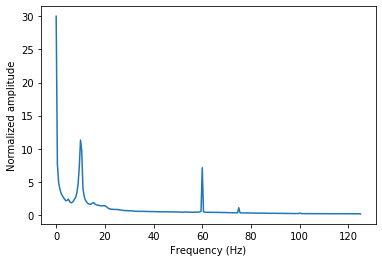

In [16]:
sp = np.fft.rfft(epoch,axis = 1)
amp = np.abs(sp)/len(epoch_time) * 2
mean_amp = np.mean(amp, axis = 0)
freq = np.fft.rfftfreq(len(epoch_time), 1/sr)

plt.plot(freq,mean_amp)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Normalized amplitude')
plt.show()

## Notice that there are two prominent features in the freq domain representation. Make a lp filter that gets rid of power > 20Hz (you'll know if it worked if you get rid of the spike at 60Hz)
* Because our apply_filter function isn't optimized to work on matrices (we could do that, but haven't) you will need to loop and apply filter to each trial
* bonus if you finish the other stuff: make the apply_filt function matrisized! pay attention to the dimension of the data you are passing into the fft function - you want to fft across time! I wrote one and included it in my "my_brick_filter" .py file if you want to see one way to do it or to check your work...

In [25]:
lp_filt = mf.define_filt(fx=freq, filt_freq=20, type_filt='lp')
r,c = np.shape(epoch)
filt_sig = np.zeros_like(epoch)
for i in np.arange(0,r):
    filt_sig[i,:] = mf.apply_filt(input_sig=epoch[i,:], input_filter=lp_filt)

## Then FFT it again to see if you got rid of the hf components of the signal

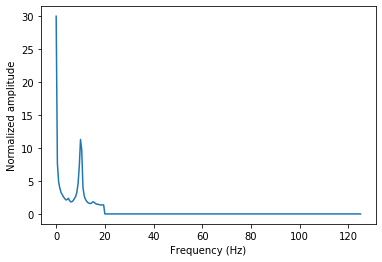

In [28]:
sp = np.fft.rfft(filt_sig,axis = 1)
amp = np.abs(sp)/len(epoch_time) * 2
mean_amp = np.mean(amp, axis = 0)
freq = np.fft.rfftfreq(len(epoch_time), 1/sr)

plt.plot(freq,mean_amp)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Normalized amplitude')
plt.show()

## Now design a band pass filter that gets rid of everything outside of the 6-14Hz range (where that big bump is...)
* To design a band pass filter, make a lp filter, then make a hp filter
* Then combine the two filters so that the frequencies you want are marked with a "1" in the filter and those that you don't want are marked with a "0" in the filter. 
* Then call the apply_filt function
* Then you should be left with only those frequencies that pass the lp and the hp filters (i.e. a band pass filter)!

In [31]:
lp_filt = mf.define_filt(fx=freq, filt_freq=14, type_filt='lp')
hp_filt = mf.define_filt(fx=freq, filt_freq=6, type_filt='hp')
bp_filt = np.multiply(lp_filt,hp_filt)

In [33]:
filt_sig = np.zeros_like(epoch)
for i in np.arange(0,r):
    filt_sig[i,:] = mf.apply_filt(input_sig=epoch[i,:], input_filter=bp_filt)

## Then FFT and look at filtered signal in the time and frequency domains (time domain on one plot, and freq on the other)

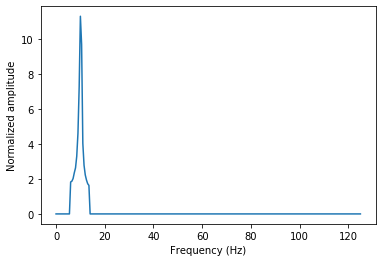

In [34]:
sp = np.fft.rfft(filt_sig,axis = 1)
amp = np.abs(sp)/len(epoch_time) * 2
mean_amp = np.mean(amp, axis = 0)
freq = np.fft.rfftfreq(len(epoch_time), 1/sr)

plt.plot(freq,mean_amp)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Normalized amplitude')
plt.show()

## You can also make a band-stop filter using a similar logic
* A band stop filter will reduce the amplitude of a specific range of frequencies - often used for removing an artifact like line noise (60Hz AC noise) from physiological recordings!
* Think for a minute, or maybe sketch out, what this kind of a filter should look like
* Use this to selectively get rid of the 60Hz line noise in the data by generated a band-stop filter over 50-70Hz

In [41]:
lp_filt = mf.define_filt(fx=freq, filt_freq=14, type_filt='hp')
hp_filt = mf.define_filt(fx=freq, filt_freq=6, type_filt='lp')
bp_filt = lp_filt + hp_filt

In [43]:
filt_sig = np.zeros_like(epoch)
for i in np.arange(0,r):
    filt_sig[i,:] = mf.apply_filt(input_sig=epoch[i,:], input_filter=bp_filt)

## Then FFT and look at filtered signal in the frequency domain

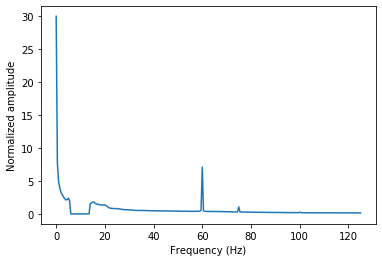

In [44]:
sp = np.fft.rfft(filt_sig,axis = 1)
amp = np.abs(sp)/len(epoch_time) * 2
mean_amp = np.mean(amp, axis = 0)
freq = np.fft.rfftfreq(len(epoch_time), 1/sr)

plt.plot(freq,mean_amp)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Normalized amplitude')
plt.show()

# BONUS: Read the end of the tutorial and figure out to do this all more gracefully using blackman windowed filters :) 